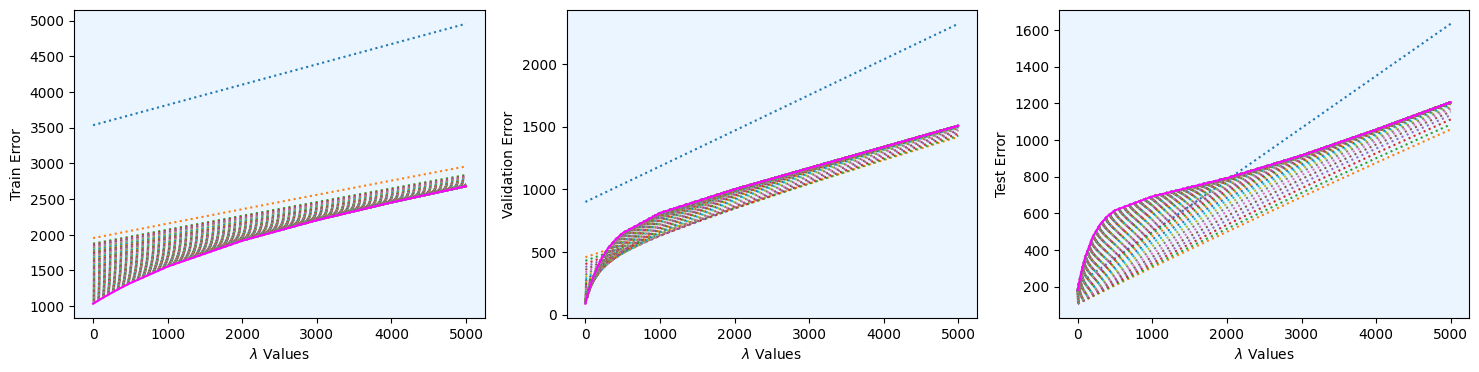

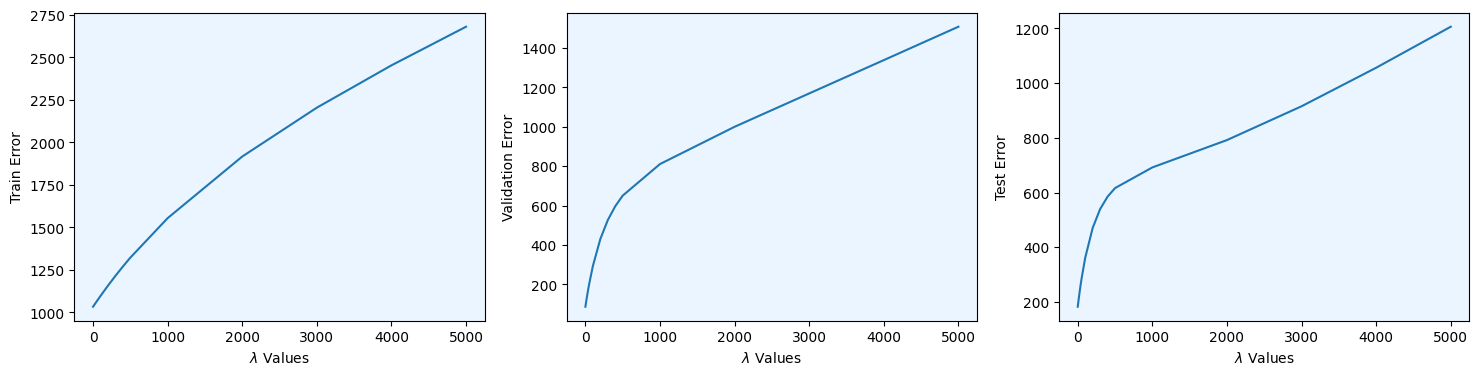

In [64]:
import numpy as np
import matplotlib.pyplot as plt

train_data = np.genfromtxt('A2Q2Data_train.csv', delimiter=',')
entire_train_X = train_data[:, :100].T
entire_train_Y = train_data[:, -1]
test_data = np.genfromtxt('A2Q2Data_test.csv', delimiter=',')
test_X = test_data[:, :100].T
test_Y = test_data[:, -1]
num_iterations = 1000
dimensions, num_points = entire_train_X.shape
train_X = entire_train_X[:, :int(0.8*num_points)]
train_Y = entire_train_Y[:int(0.8*num_points)]
train_xxT, train_xy = np.matmul(train_X, train_X.T), np.matmul(train_X, train_Y)
validate_X = entire_train_X[:, int(0.8*num_points):]
validate_Y = entire_train_Y[int(0.8*num_points):]

w_ML = np.matmul(np.matmul(np.linalg.inv(np.matmul(train_X, train_X.T)), train_X), train_Y)

def calculate_error(w, X, Y, lamb):
    return np.linalg.norm((np.matmul(X.T, w) - Y))**2 + lamb*(np.linalg.norm(w)**2)

def step(t):
    return 3*1e-6

def gradient(w, XXT, XY, lamb):
    return np.array(2*(np.matmul(XXT, w) - XY)) + 2*lamb*w

lambs = np.array([0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5, 10, 12, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000])
num_lambs = lambs.shape[0]
lamb_w = np.zeros((num_lambs, num_iterations, dimensions))
lamb_train_errors = np.zeros((num_lambs, num_iterations))
lamb_validate_errors = np.zeros((num_lambs, num_iterations))
lamb_test_errors = np.zeros((num_lambs, num_iterations))
for i, lamb in enumerate(lambs):
    w = np.zeros(dimensions)
    for __ in range(num_iterations):
        w = w-step(__)*gradient(w, train_xxT, train_xy, lamb)
        lamb_w[i, __] = w
        lamb_train_errors[i, __] = calculate_error(w, train_X, train_Y, lamb)
        lamb_validate_errors[i, __] = calculate_error(w, validate_X, validate_Y, lamb)
        lamb_test_errors[i, __] = calculate_error(w, test_X, test_Y, lamb)

fig, axes = plt.subplots(1, 3, figsize=(18, 4))
for iteration in range(num_iterations//10):
    y = np.array([lamb_train_errors[:, iteration], lamb_validate_errors[:, 10*iteration], lamb_test_errors[:, 10*iteration]])
    y_labels = ['Train Error', 'Validation Error', 'Test Error']
    for i, ax in enumerate(axes):
        ax.plot(lambs, y[i], linestyle=':')
        ax.set_xlabel(r"$\lambda$ Values")
        ax.set_ylabel(y_labels[i])
        ax.set_facecolor('#ebf5ff')
for i, ax in enumerate(axes):
    ax.plot(lambs, y[i], color='magenta')
    ax.set_xlabel(r"$\lambda$ Values")
    ax.set_ylabel(y_labels[i])
    ax.set_facecolor('#ebf5ff')
plt.savefig('images/Q2/ridge_all_iter')
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 4))
for i, ax in enumerate(axes):
    ax.plot(lambs, y[i])
    ax.set_xlabel(r"$\lambda$ Values")
    ax.set_ylabel(y_labels[i])
    ax.set_facecolor('#ebf5ff')
plt.savefig('images/Q2/ridge_final')
plt.show()